# Проверка гипотез по увеличению выручки и оценка результов A/B теста в интернет-магазине  <a class="anchor" id="s-bullet"></a>

**Описание данных**


1. Файл ``/datasets/hypothesis.csv``

- ``Hypothesis`` — краткое описание гипотезы
- ``Reach`` — охват пользователей по 10-балльной шкале
- ``Impact`` — влияние на пользователей по 10-балльной шкале
- ``Confidence`` — уверенность в гипотезе по 10-балльной шкале
- ``Efforts`` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы


2. Файл ``/datasets/orders.csv``
- ``transactionId`` — идентификатор заказа;
- ``visitorId`` — идентификатор пользователя, совершившего заказ;
- ``date`` — дата, когда был совершён заказ;
- ``revenue`` — выручка заказа;
- ``group`` — группа A/B-теста, в которую попал заказ.


3. Файл ``/datasets/visitors.csv`` 
- ``date`` — дата;
- ``group`` — группа A/B-теста;
- ``visitors`` — количество пользователей в указанную дату в указанной группе A/B-теста

**Цель проекта**

На основе предоставленных данных крупного интернет-магазина нужно:

- приоритезировать гипотезы с перспективой увеличения выручки.
- проанализировать результаты A/B - теста.


**Ход исследования:**


**Шаг 1. Обзор данных.**


**Шаг 2. Предобработка данных.**


**Шаг 3. Приоритизация гипотез.**

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.


**Шаг 4. Анализ A/B-теста.**

- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объяснить его.

**Шаг 5. Общий вывод.**

## Содержание проекта
* [**Загрузка и обзор данных**](#a-bullet)
* * [Итоги](#aa-bullet)    
* [**Предобработка данных**](#b-bullet)
* * [Итоги](#ba-bullet)
* [**Приоритезация гипотез**](#c-bullet)
* * [Приоритезация гипотез с помощью фреймворка ICE](#ca-bullet)
* * [Приоритезация гипотез с помощью фреймворка RICE](#cb-bullet)
* * [Итоги](#cc-bullet)
* [**Анализ результатов A/B - теста**](#d-bullet)    
* * [Кумулятивная выручка по группам](#da-bullet)
* * [Кумулятивный средний чек по группам](#db-bullet)
* * [Относительное изменение кумулятивного среднего чека группы B к группе А](#dc-bullet)
* * [Кумулятивное среднее количество заказов на посетителя по группам](#dd-bullet)
* * [Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A](#de-bullet)
* * [Количество заказов по пользователям](#df-bullet)
* * [Определение аномальных пользователей по количеству заказов](#dg-bullet)
* * [Стоимость заказов](#dh-bullet)
* * [Определение аномальных заказов по стоимости](#di-bullet)
* * [Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным](#dj-bullet)
* * [Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#dk-bullet)
* * [Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным](#dl-bullet)
* * [Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#dm-bullet)
* * [Итоги](#dn-bullet)
* [**Общий вывод**](#e-bullet)

## Обзор данных <a class="anchor" id="a-bullet"></a>

In [1]:
# импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import math as mth
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#увеличим размер отображения столбцов
pd.options.display.max_colwidth = 200

In [2]:
#загрузим данные

hypothesis, orders, visitors = (
        pd.read_csv('datasets/hypothesis.csv'),
        pd.read_csv('datasets/orders.csv'),
        pd.read_csv('datasets/visitors.csv')
)

In [3]:
#функция для вывода общей информации
def genetal_info(data):
     return print('Первые 10 строк датафрейма:'), \
    display(data.head(10)), \
    print('Информация о датафрейме:'), \
    display(data.info()), \
    print('Размер датафрейма:'), \
    display(data.shape), \
    print('Название столбцов:'), \
    display(data.columns), \
    print('Количество явных дубликатов:'), \
    display(data.duplicated().sum()), \
    print('Процент пропущенных значений:'), \
    display(pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')), \
    print('Визуализация пропусков:'), \
    display(msno.matrix(data, labels=True))

Первые 10 строк датафрейма:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Размер датафрейма:


(9, 5)

Название столбцов:


Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

Количество явных дубликатов:


0

Процент пропущенных значений:


,0
Hypothesis,0.0
Reach,0.0
Impact,0.0
Confidence,0.0
Efforts,0.0


Визуализация пропусков:


<Axes: >

(None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None)

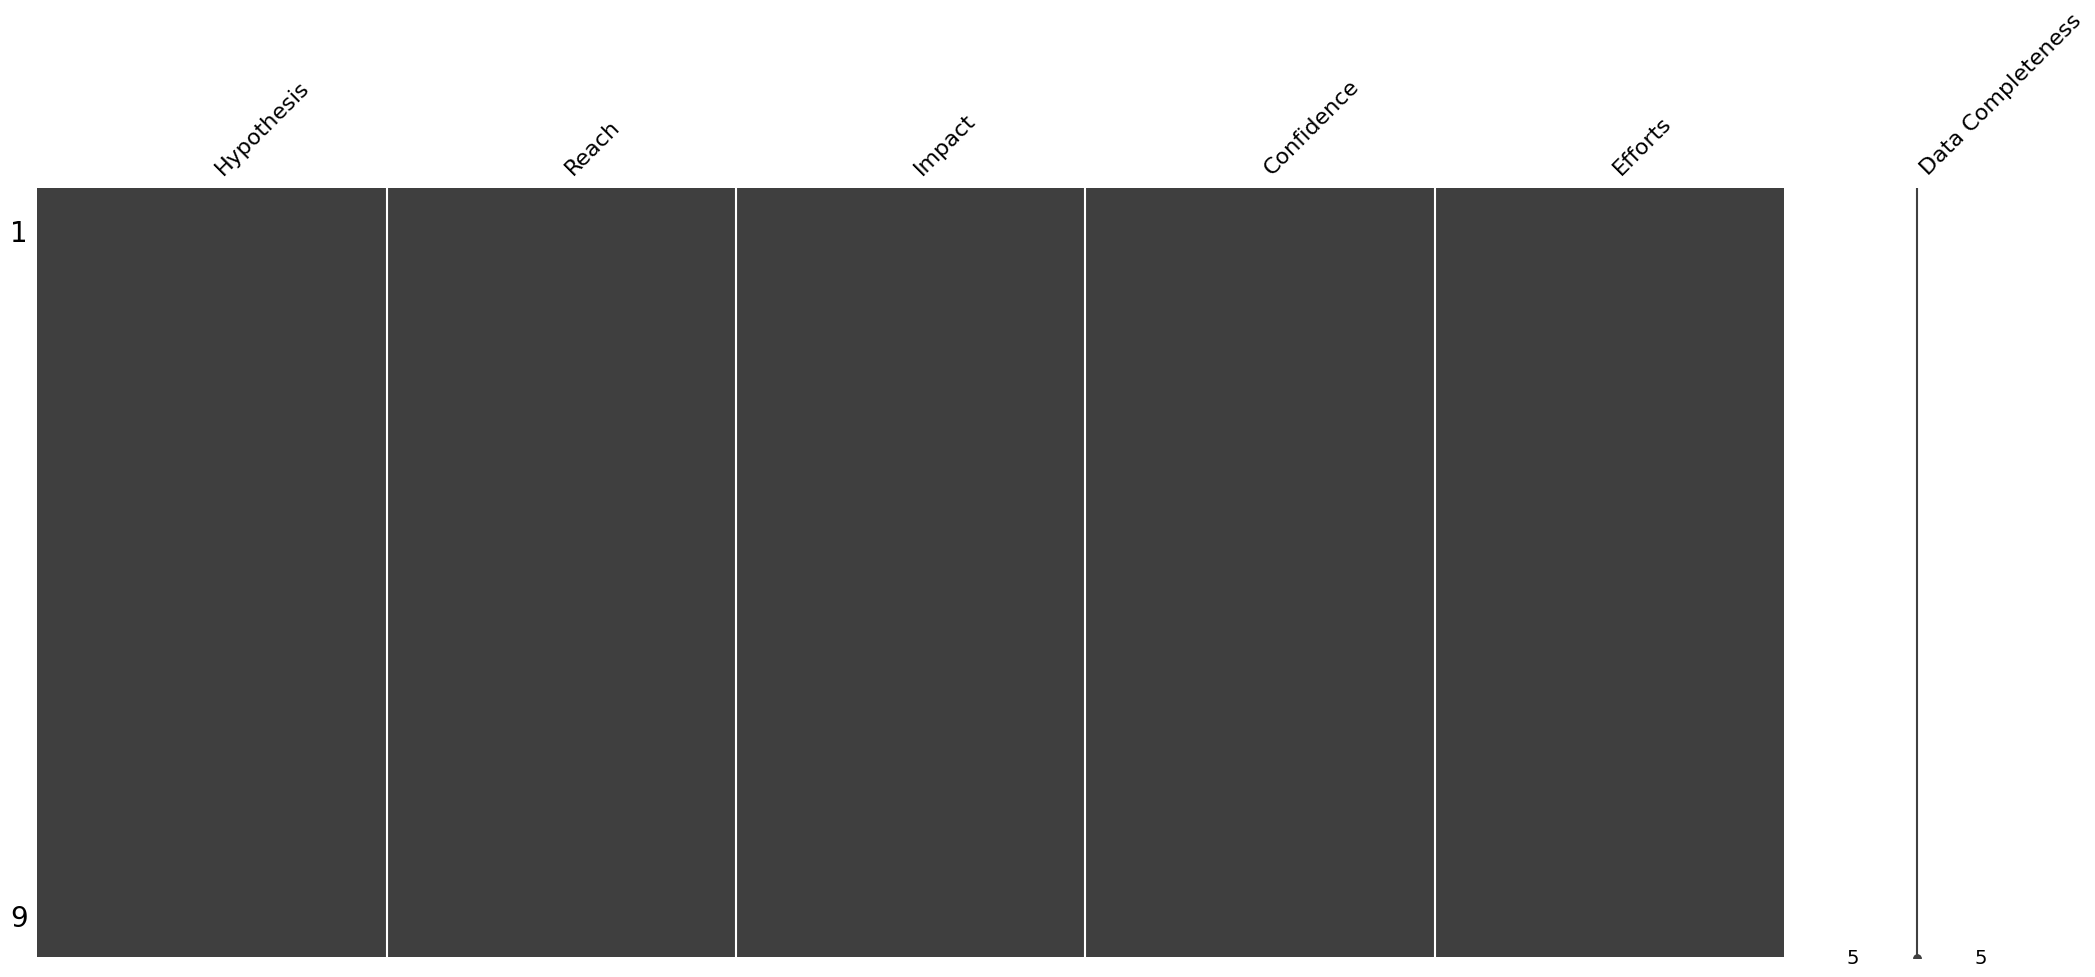

In [4]:
#общая информация о датасете hypothesis

genetal_info(hypothesis)

Первые 10 строк датафрейма:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

Размер датафрейма:


(1197, 5)

Название столбцов:


Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

Количество явных дубликатов:


0

Процент пропущенных значений:


,0
transactionId,0.0
visitorId,0.0
date,0.0
revenue,0.0
group,0.0


Визуализация пропусков:


<Axes: >

(None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None)

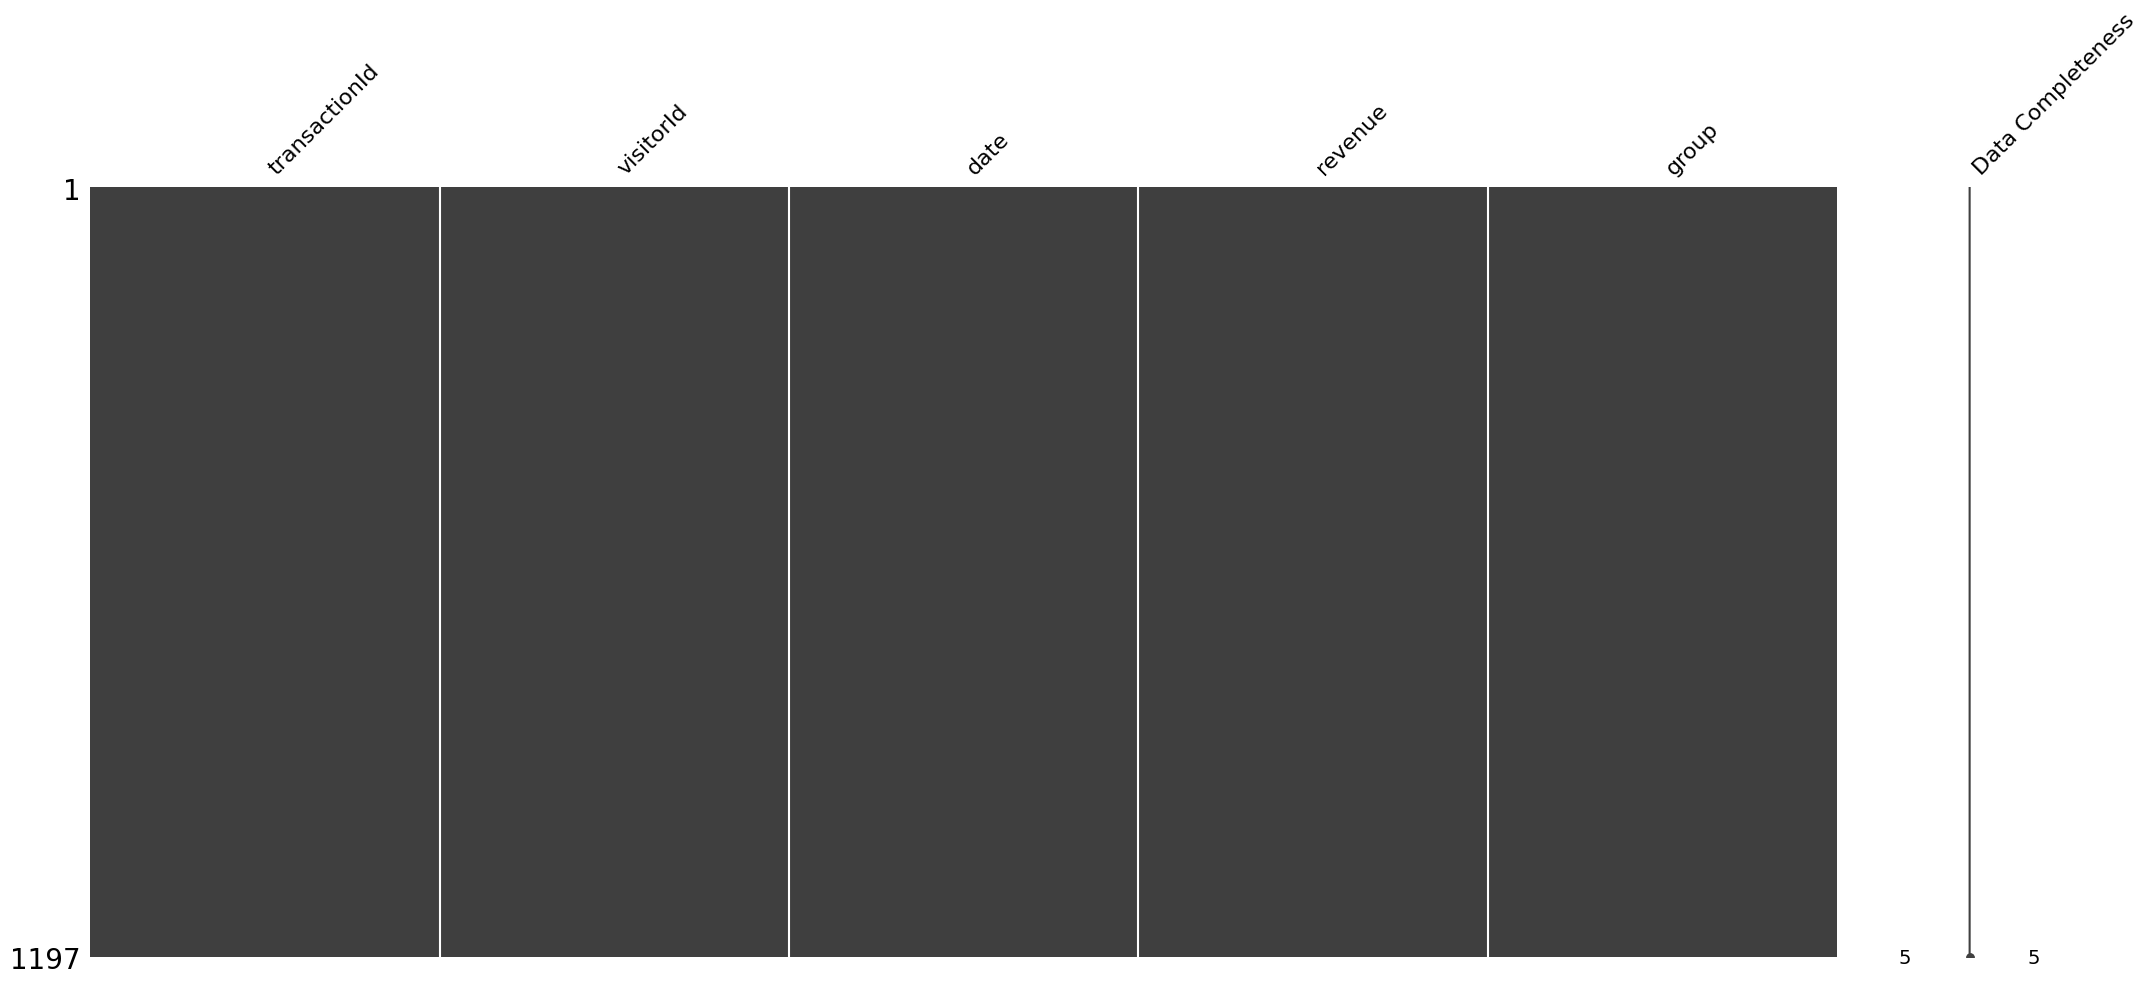

In [5]:
#общая информация о датаете orders

genetal_info(orders)

Первые 10 строк датафрейма:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Размер датафрейма:


(62, 3)

Название столбцов:


Index(['date', 'group', 'visitors'], dtype='object')

Количество явных дубликатов:


0

Процент пропущенных значений:


,0
date,0.0
group,0.0
visitors,0.0


Визуализация пропусков:


<Axes: >

(None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None)

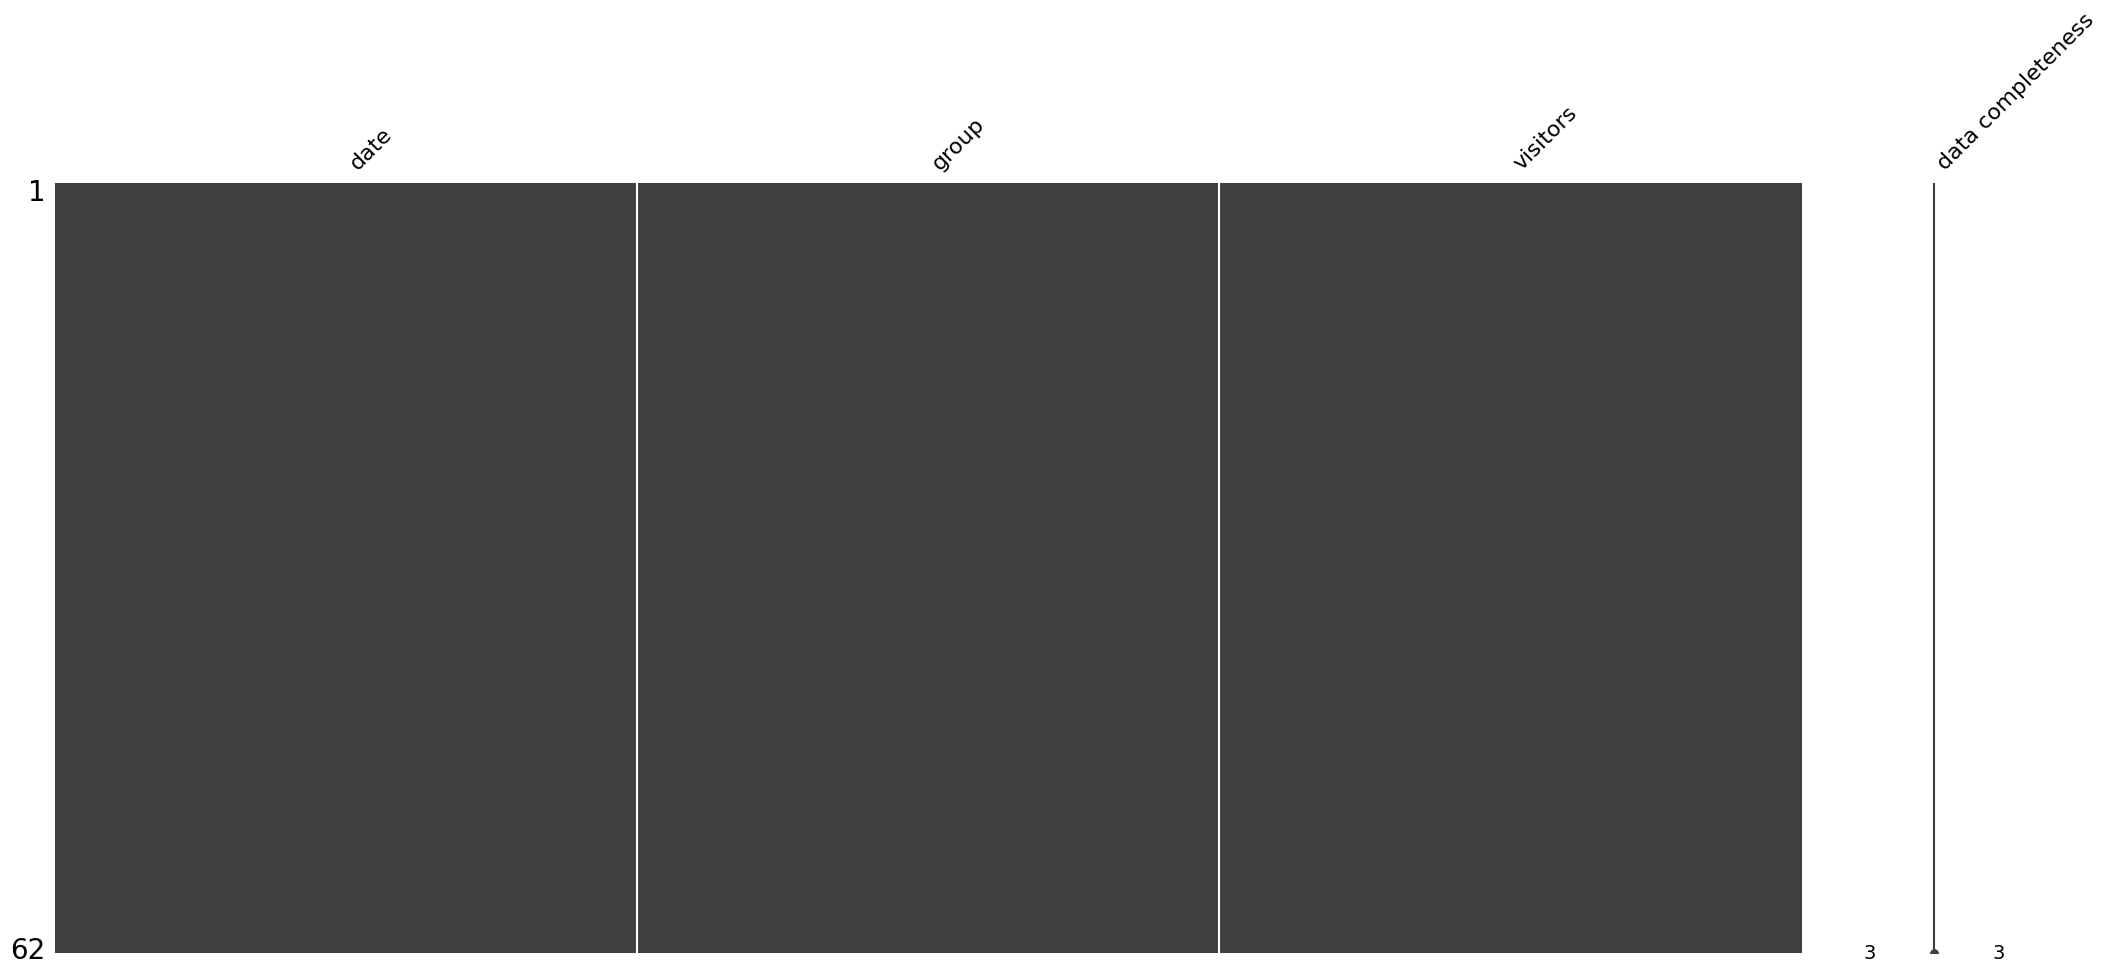

In [6]:
#общая информация о датаете visitors

genetal_info(visitors)

Первые 10 строк датафрейма:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Размер датафрейма:


(62, 3)

Название столбцов:


Index(['date', 'group', 'visitors'], dtype='object')

Количество явных дубликатов:


0

Процент пропущенных значений:


,0
date,0.0
group,0.0
visitors,0.0


Визуализация пропусков:


<Axes: >

(None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None)

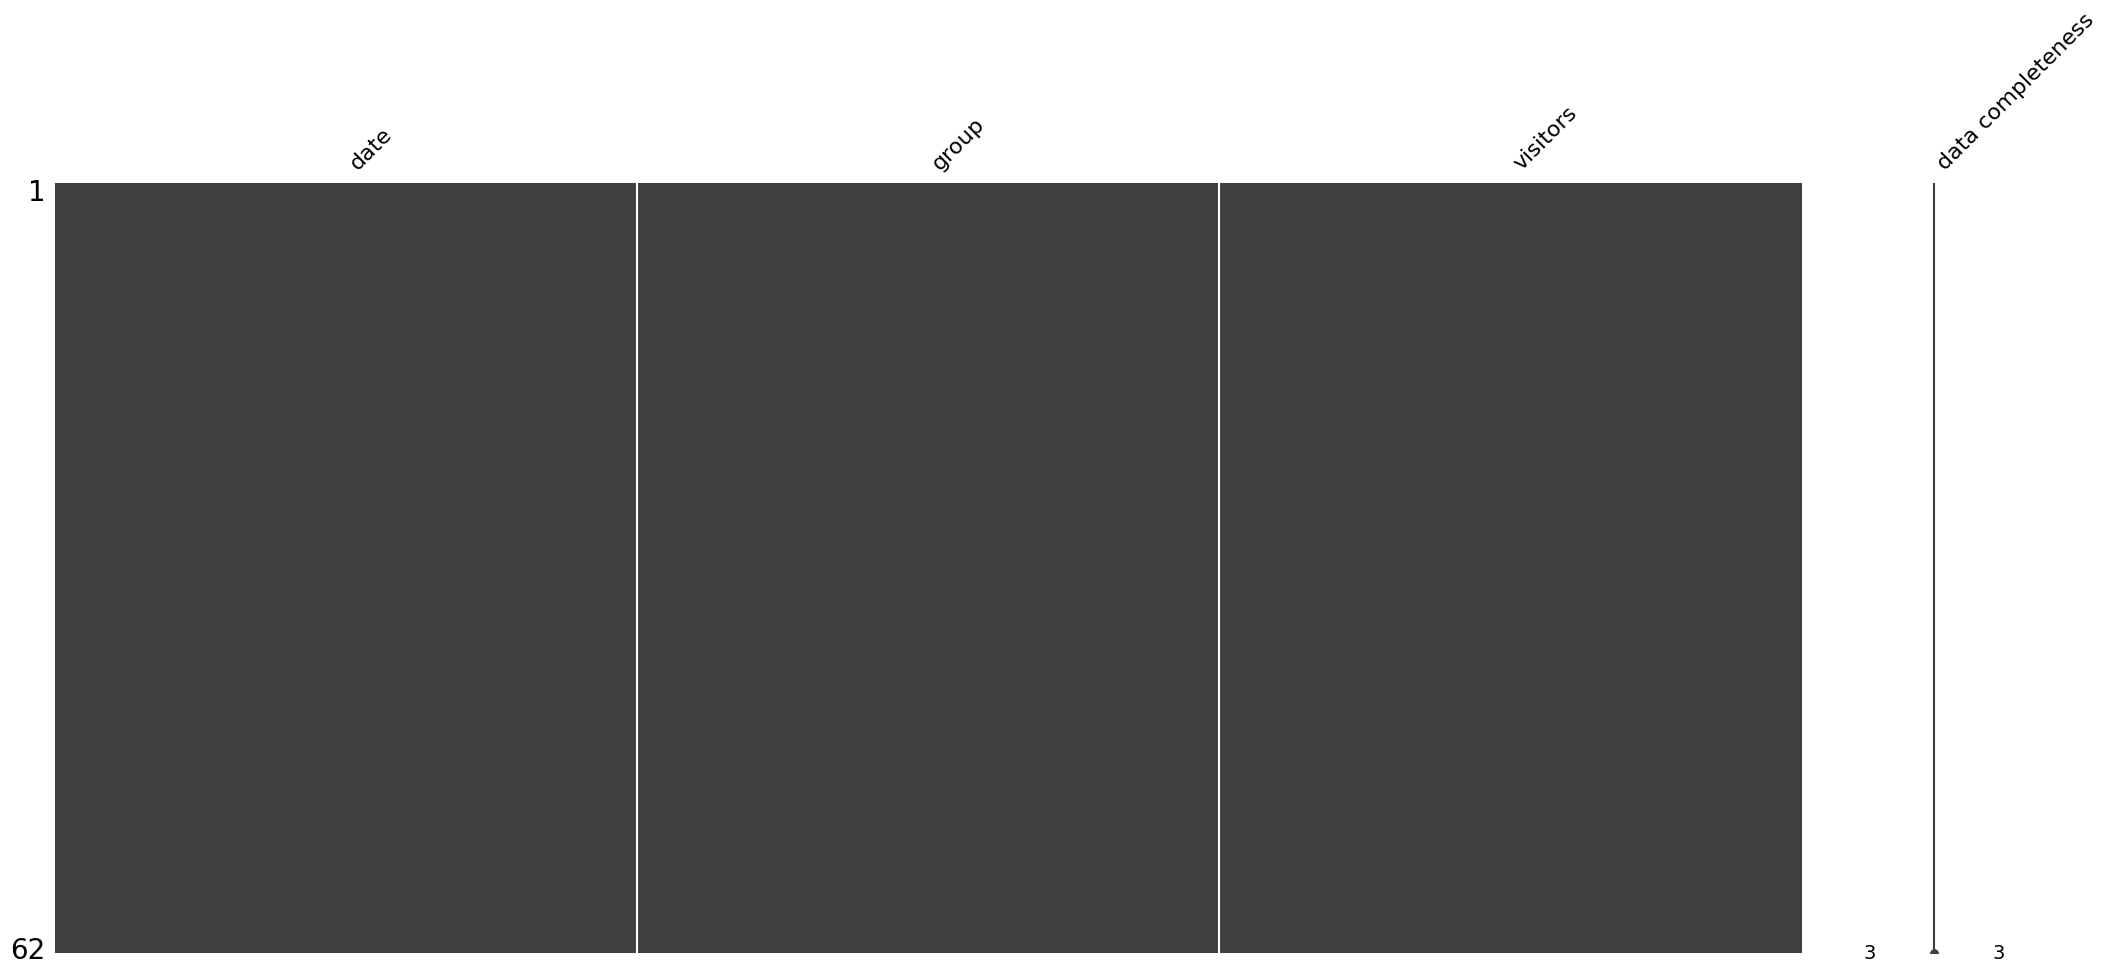

In [7]:
#общая информация о датаете visitors

genetal_info(visitors)

### Итоги <a class="anchor" id="aa-bullet"></a>

<div style="border:solid pink 3px; padding: 20px">

    
    
**В ходе обзора данных:**
    
    
       1. hypothesis
    - пропусков не обнаружено.
    - явных дубликатов не обнаружено.
    - обнаружены 'Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts' - некорректные названия столбцов. Нужно привести к snake_case.

    
       2. orders
    - пропусков не обнаружено.
    - явных дубликатов не обнаружено.
    - обнаружены 'transactionId', 'visitorId' - некоррекрные названия столбцов. Нужно привести их к snake_case.
    - обнаружен некорректный тип данных в столбце date - object. Нужно преобразовать на datetime.
    
    
       3. visitors
    - пропусков не обнаружено.
    - явных дубликатов не обнаружено.
    - обнаружен некорректный тип данных в столбце date - object. Нужно преобразовать на datetime.
    

## Предобработка данных <a class="anchor" id="b-bullet"></a>

In [8]:
# Преобразование названий столбцов
hypothesis.columns = hypothesis.columns.str.lower()

orders = orders.rename(
columns={
'transactionId': 'transaction_id',
'visitorId': 'visitor_id'}
)

In [9]:
display(hypothesis.columns)
display(orders.columns)
display(visitors.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

Index(['date', 'group', 'visitors'], dtype='object')

In [10]:
# Преобразование типов данных значений в столбцах

orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проведем дополнительные исследования для того, чтобы лучше разобраться в данных:

1. Узнаем даты начала и окончания теста

In [11]:
print('Первый день тестирования:', visitors['date'].dt.date.min())
print('Последний день тестирования:', visitors['date'].dt.date.max())

Первый день тестирования: 2019-08-01
Последний день тестирования: 2019-08-31


Тест длится ровно месяц с 1 до 31 августа 2019 года.

2. Посчитаем количество пользователей в каждой группе

In [12]:
orders.groupby('group').agg({'visitor_id': 'nunique'})

,visitor_id
group,
A,503
B,586


Количество пользователей, попавших в различные группы, должно отличаться не
более, чем на 0.5%. В данном случае разница составляет ~ 15%, что говорит о неточности проведения теста.

3. Посмотрим на динамику посетителей по дням по группам

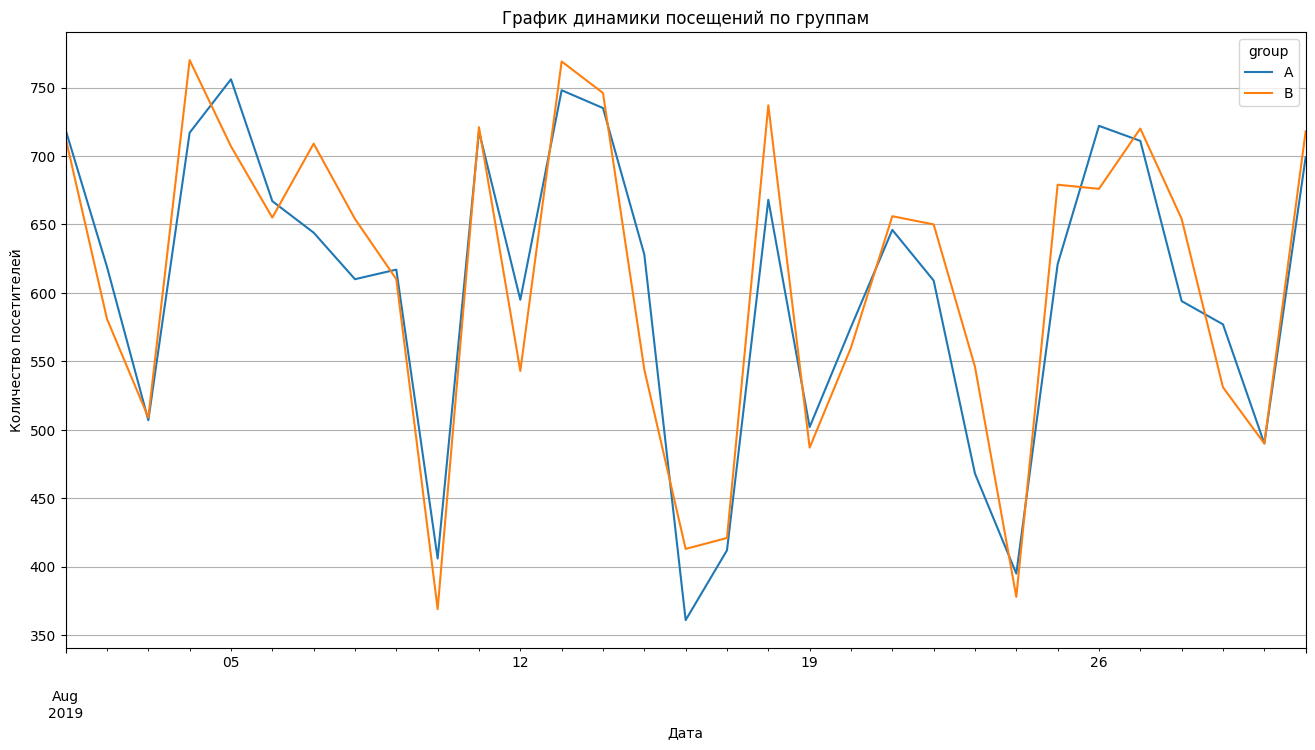

In [13]:

(
    visitors
    .pivot_table(index='date', values='visitors', columns=['group'])
    .plot(grid=True, figsize=(16, 8))
)
plt.title('График динамики посещений по группам')
plt.xlabel('Дата')
plt.ylabel('Количество посетителей')
plt.show()

Для обоих групп граффики похожи, идут довольно близко друг к другу, динамика посещейний скачет для обоих групп.

Наблюдаются скачки посещаемости в начале недели (700-750 посещений), как и спады в пятницу-субботу каждой недели (~ 400 посещений). Амплитуда колебаний к концу месяца становится меньше.

### Итоги <a class="anchor" id="ba-bullet"></a>

<div style="border:solid pink 3px; padding: 20px">

**В ходе предобработки данных:**
    
    - были приведены к snake_case некорректные названия столбцов
    - были преобразованы типы данных значений столбцов с датой к типу datetime

**Были проведены дополнительные исследования, в рамках которых получены данные результаты:**
    
    - Тестирование длится ровно месяц с 1.08.2019 до 31.08.2019.
    - Пользователи распределены в группах не равномерно. Разница в количестве пользователей между группами приблизительно 15%. Результаты анализа тестирования могут быть ненадежными.
    - Динамика посещейний скачет для обоих групп. Наблюдаются скачки посещаемости в начале недели (700-750 посещений), как и спады в пятницу-субботу каждой недели (~ 400 посещений). Амплитуда колебаний к концу месяца становится меньше.

## Приоритезация гипотез <a class="anchor" id="c-bullet"></a>

В датафрейме **hypothesis** 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами ``Reach``, ``Impact``, ``Confidence``, ``Effort``.

Займемся их приоритезацией.

### Приоритизации гипотез с помощью фреймворка ICE <a class="anchor" id="ca-bullet"></a>

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач.

``ICE SCORE = impact * confidence / effort``

In [14]:
# создадим отдельный столбец в датафрейме hypothesis с расчетом ICE SCORE
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis['ice'] = round(hypothesis['ice'], 2)

In [15]:
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Топ 5 самых приоритеных гипотез исходя из расчетов ICE:
- 8. Запустить акцию, дающую скидку на товар в день рождения
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

### Приоритизации гипотез с помощью фреймворка RICE <a class="anchor" id="cb-bullet"></a>

RICE (от англ. reach, impact, confidence, effort / ease «охват, влияние, уверенность, усилия / простота»)

``RICE SCORE = impact * confidence * reach / effort``

In [16]:
# создадим отдельный столбец в датафрейме hypothesis с расчетом RICE SCORE
hypothesis['rice'] = hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach'] / hypothesis['efforts']
hypothesis['rice'] = round(hypothesis['rice'], 2)

In [17]:
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Топ-5 самых приоритетных гипотез исходя из расчета RICE:

- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- 8. Запустить акцию, дающую скидку на товар в день рождения	

### Итоги: <a class="anchor" id="cc-bullet"></a>

 <div style="border:solid pink 3px; padding: 20px">
В ходе приоритезации гипотез было выявленно, что пять самых приортетных гипотез, полученных с помощью фреймворка ICE совпадают с пятью самыми приоритетными гипотезами, полученными с помощью фреймворка RICE. 

    1. ICE
    Cамая приоритетная гипотеза: "Запустить акцию, дающую скидку на товар в день рождения" - ее показатели оказались самыми высокими.
    2. RICE 
    Самая приоритетная гипотеза: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", в рейтинге ICE она была на 3 месте. А гипотеза, которая была на первом песте в рейтинге ICE теперь на 5 месте.
    

Так получилось, потому что при расчете RICE помимо параметров ICE используется дополнительный - reach (охват). Он отвечает за то, скольких пользователей затронет изменение.
- Так и получилось, что у гипотезы "Запустить акцию, дающую скидку на товар в день рождения" - маленький показатель reach.
- А у "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" - очень высокий.
    

В качестве самых приоритетных гипотез по двум фреймворкам я могу рекомендовать -
    
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и
    
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
    

## Анализ A/B-теста <a class="anchor" id="d-bullet"></a>

Результаты A/B-теста описаны в датафреймах ``orders`` и ``visitors``.
Проведем его анализ:

In [18]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Проверим, не пересекаются ли группы по посетителям:

In [19]:
len(set(orders[orders['group'] == 'A']['visitor_id'].unique()) & set(orders[orders['group'] == 'B']['visitor_id'].unique()))

58

58 пользователей присутствовали в обоих группах. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно. Стоит передать об этой ошибке разработчикам.

In [20]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Кумулятивная выручка по группам <a class="anchor" id="da-bullet"></a>

In [21]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (
    datesGroups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
           .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (
    datesGroups
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
           .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = (
    ordersAggregated
    .merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Проверим, корректно ли был создан датафрейм cumulativeData.

In [22]:
print('Минимальная и максимальная дата:', cumulativeData['date'].dt.date.min(), ',', cumulativeData['date'].dt.date.max())

Минимальная и максимальная дата: 2019-08-01 , 2019-08-31


Минимальная и максмальная дата совпадают с исходными. Датафрейм не искажает исходные данные.

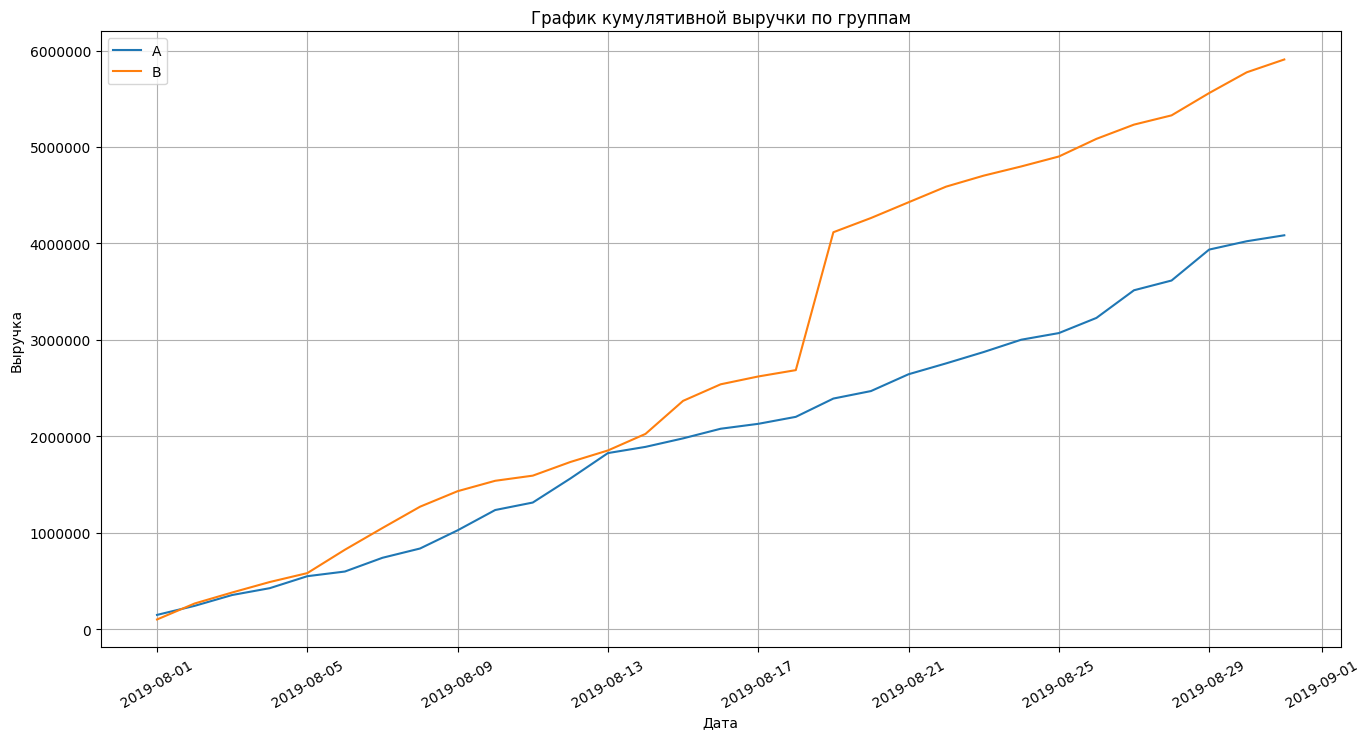

In [23]:
# строим график куммулятивной выручки по группам
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.ticklabel_format(style='plain')
plt.xticks(rotation=30)

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.show()

- Куммулятивная выручка достаточно равномерно растет для группы A.
- Для группы B заметны скачки выручки (особенно 18.08.2019), что может говорить о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Кумулятивный средний чек по группам <a class="anchor" id="db-bullet"></a>

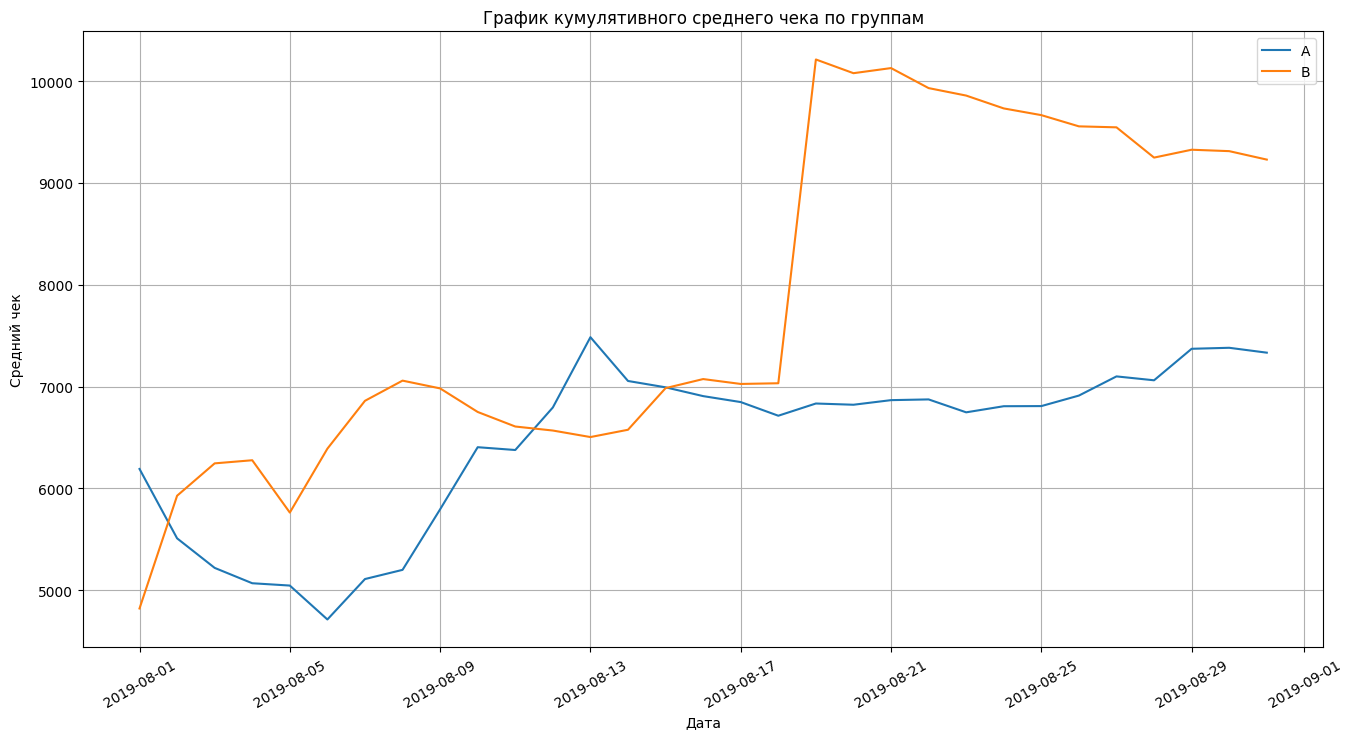

In [24]:
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.ticklabel_format(style='plain')
plt.xticks(rotation=30)

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.show()

- В первой половине месяца для группы А средний чек колебался, но во второй половине месяца относительно стабилизировался.
- Для группы B наблюдается скачок куммулятивного среднего чека 18.08.2019, как и куммулятивной выручки, что говорит о наличии аномалий.

### Относительное изменение кумулятивного среднего чека группы B к группе A <a class="anchor" id="dc-bullet"></a>

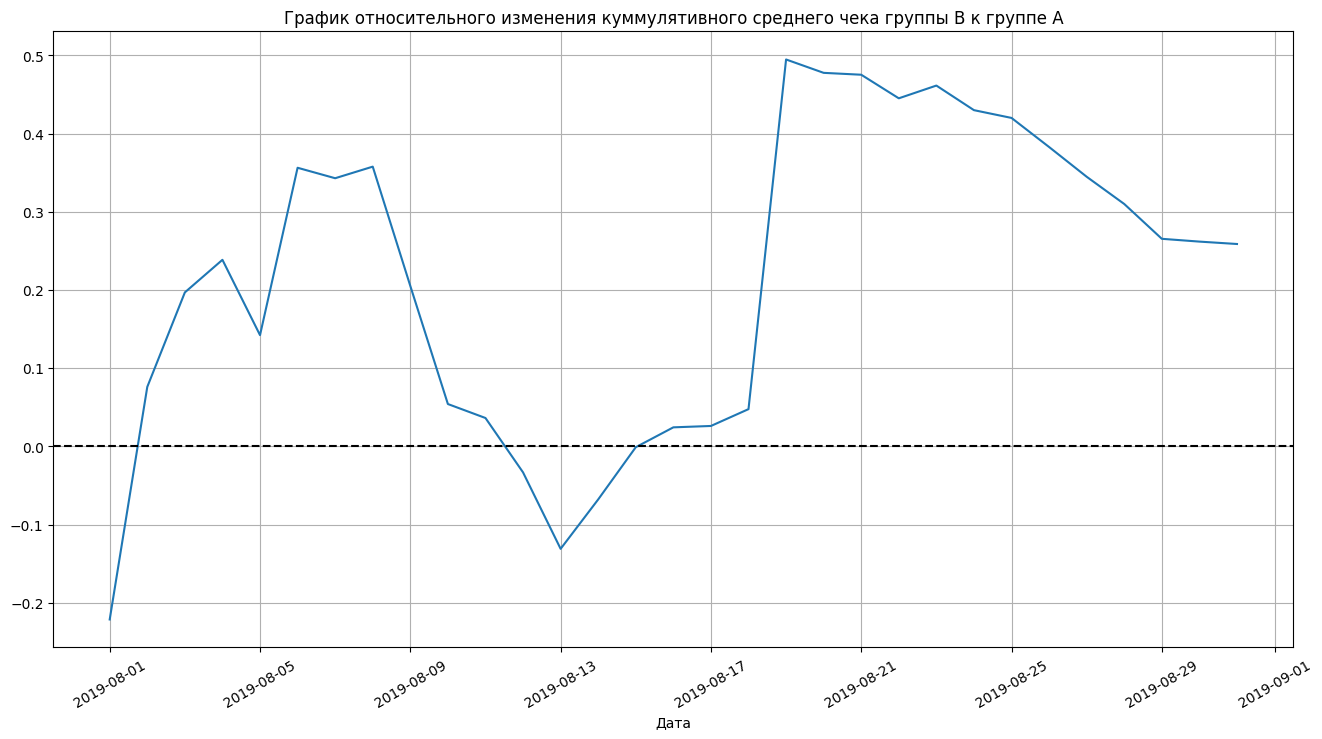

In [25]:
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.title('График относительного изменения куммулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ticklabel_format(style='plain')
plt.xticks(rotation=30)

# собираем данные в одном датафрейме
mergedCumulativeRevenue = (
    cumulativeRevenueA
    .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

# cтроим отношение средних чеков
(
    plt.plot(mergedCumulativeRevenue['date'], 
             (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
             (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

- График довольно сильно скачет 08.08.2019 сильный спад, 18.08.2019 сильный всплеск, все это так же говорит об аномалиях.
- К концу месяца, когда показатели немного выровнялись, группа B показывает лучшие результаты, чем группа А. 
Но все же возможно, что дело в выбросах.

### Кумулятивное среднее количество заказов на посетителя по группам <a class="anchor" id="dd-bullet"></a>

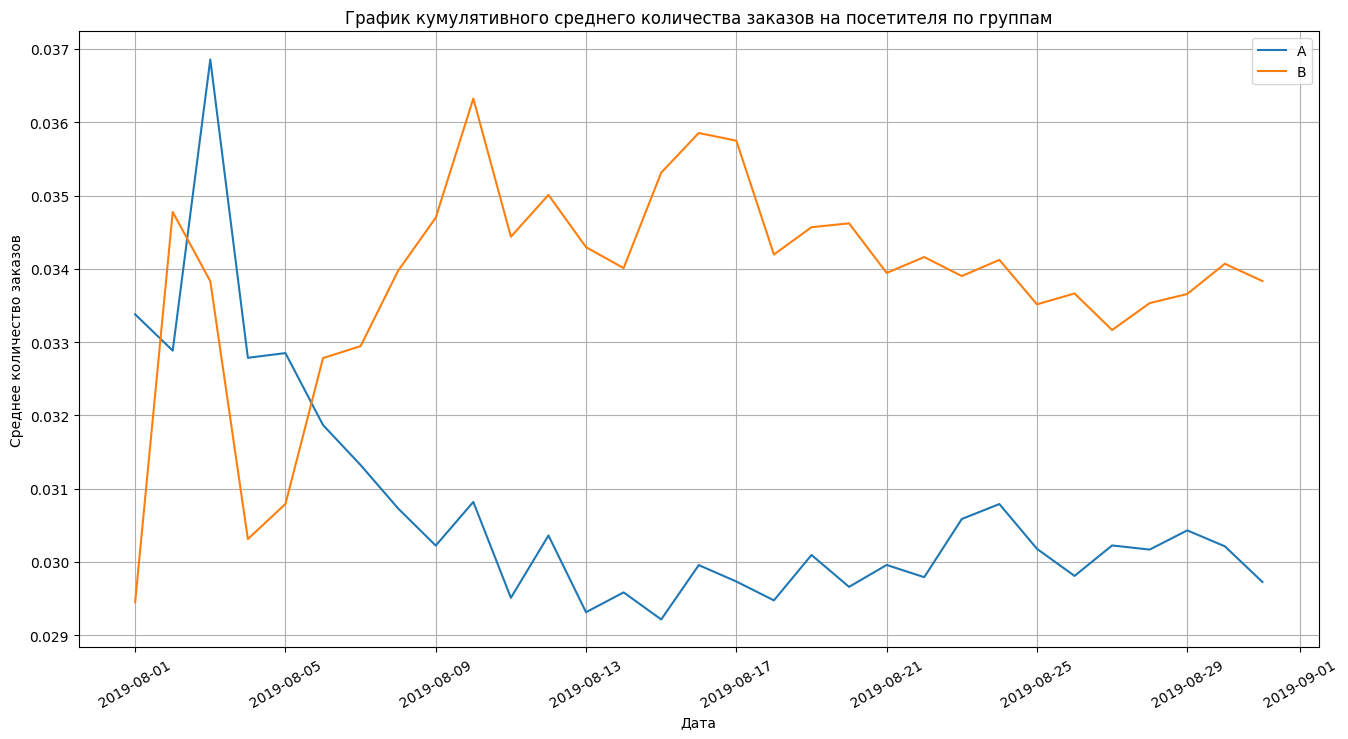

In [26]:
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.ticklabel_format(style='plain')
plt.xticks(rotation=30)


# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.show()

- Конверсия в начале месяца колебалась для обоих групп, но потом (09.08.19) конверсия группы A  значительно упала, тогда как конверсия группы B увеличилась. 
- В конце месяца конверсия стабилизировалась для группы А ( ~0.03 ) , для группы B ( ~0.034 )

### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A <a class="anchor" id="de-bullet"></a>

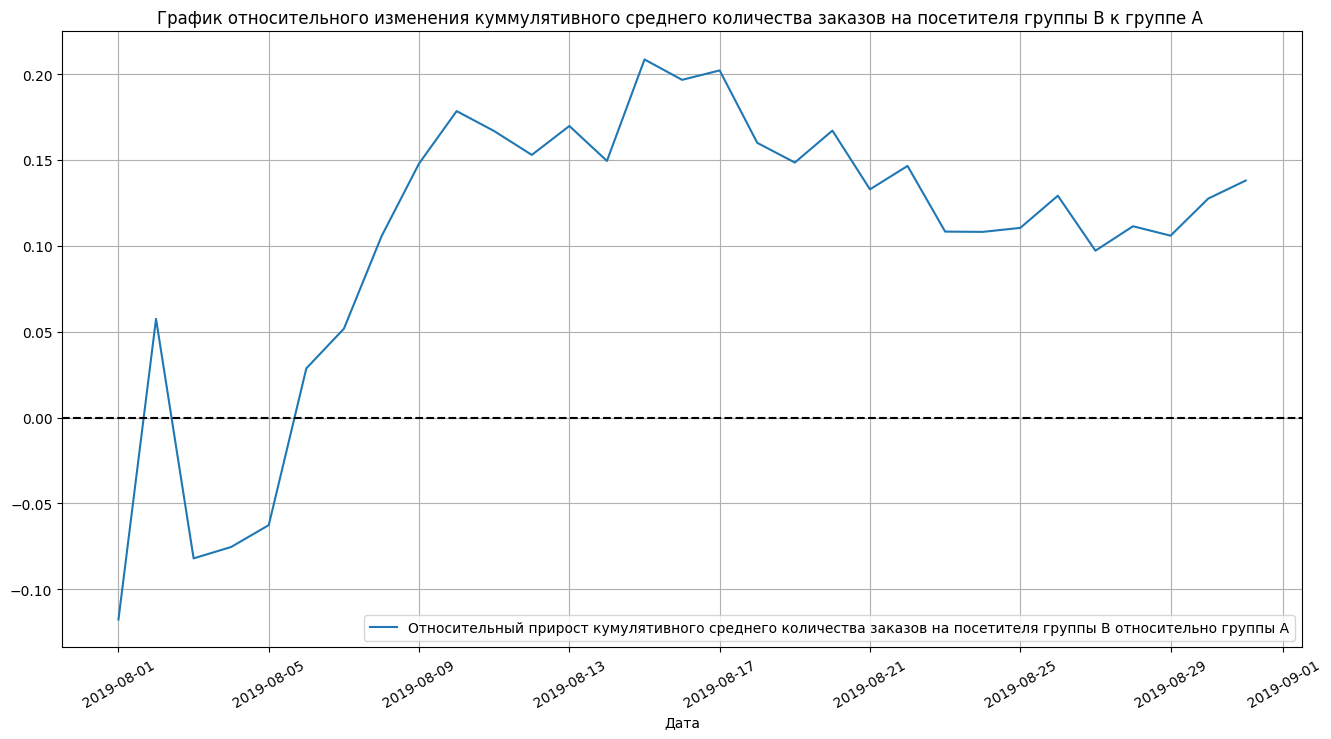

In [27]:
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.title('График относительного изменения куммулятивного среднего количества заказов на посетителя группы B к группе A ')
plt.xlabel('Дата')
plt.ticklabel_format(style='plain')
plt.xticks(rotation=30)

mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']],
           left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

(
    plt.plot(mergedCumulativeConversions['date'], 
          mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
          label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')

plt.show()

- В начале месяца группа B проигрывала группе А, но затем начала стабильно лидировать (пик 15.08.2012 ~ 2%).
- На конец наблюдаемого периода группа A стабильно отстает от В на ~1.3%

###  Количество заказов по пользователям <a class="anchor" id="df-bullet"></a>

In [28]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Построим график разпределения количества заказов по пользователям:

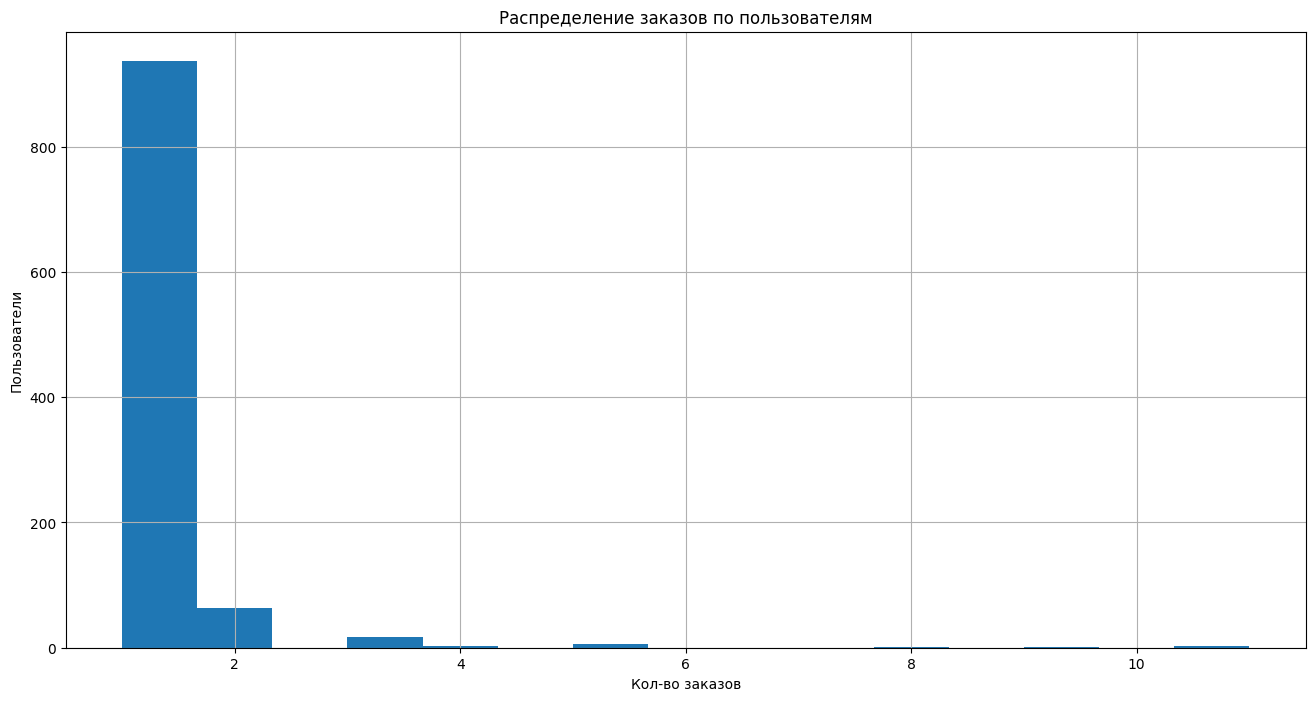

In [29]:
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.ylabel('Пользователи')
plt.xlabel('Кол-во заказов')
plt.title('Распределение заказов по пользователям')
plt.hist(ordersByUsers['orders'], bins=15) 
plt.show()

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна.

Построим точечную диаграмму числа заказов на одного пользователя:

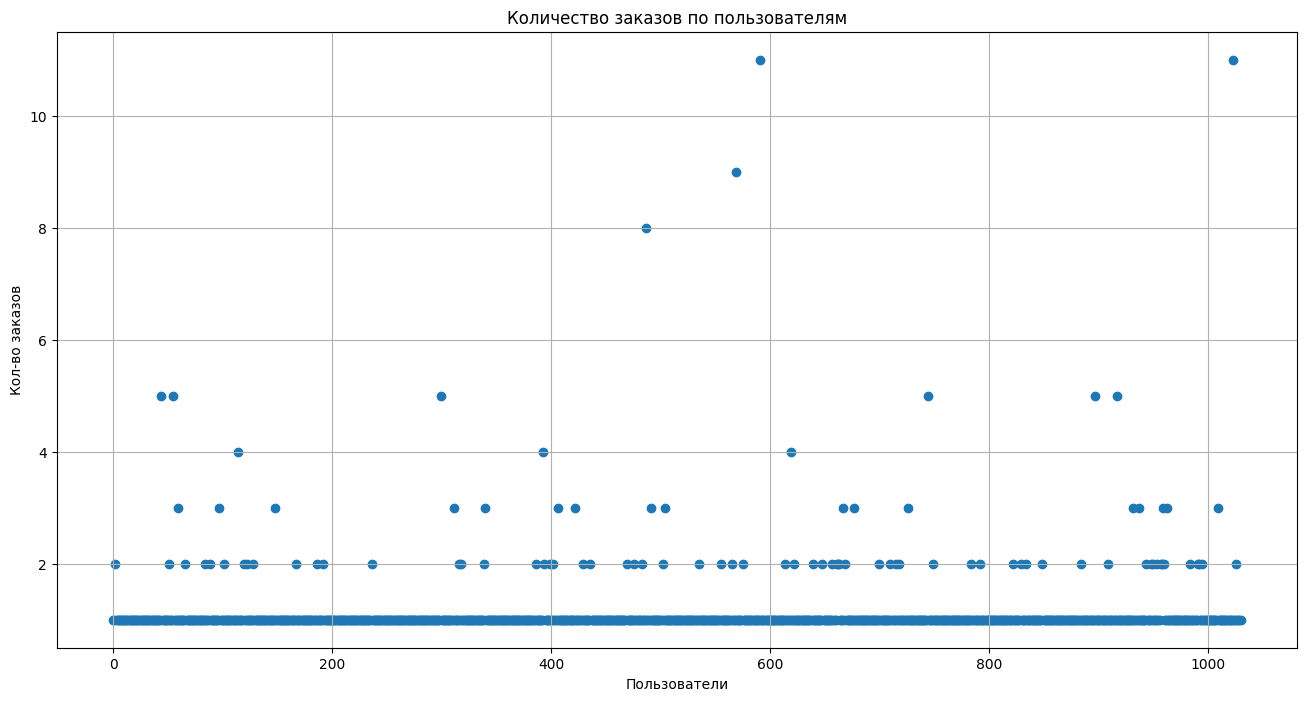

In [30]:
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.ylabel('Кол-во заказов')
plt.xlabel('Пользователи')
plt.title('Количество заказов по пользователям')
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.grid(True)
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

Выводы подтверждаются: много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

### Определение аномальных пользователей по количеству заказов <a class="anchor" id="dg-bullet"></a>

In [31]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [32]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

- 5% пользователей совершили более 2х заказов.
- И всего лишь 1% - более 4х заказов.

**Вывод:** за верхнюю границу числа заказов возьмем 4. Таким образом мы отсечем 1% пользователей с наибольшим числом заказов.

### Стоимость заказов <a class="anchor" id="dh-bullet"></a>

Построим гистограмму стоимости заказов:

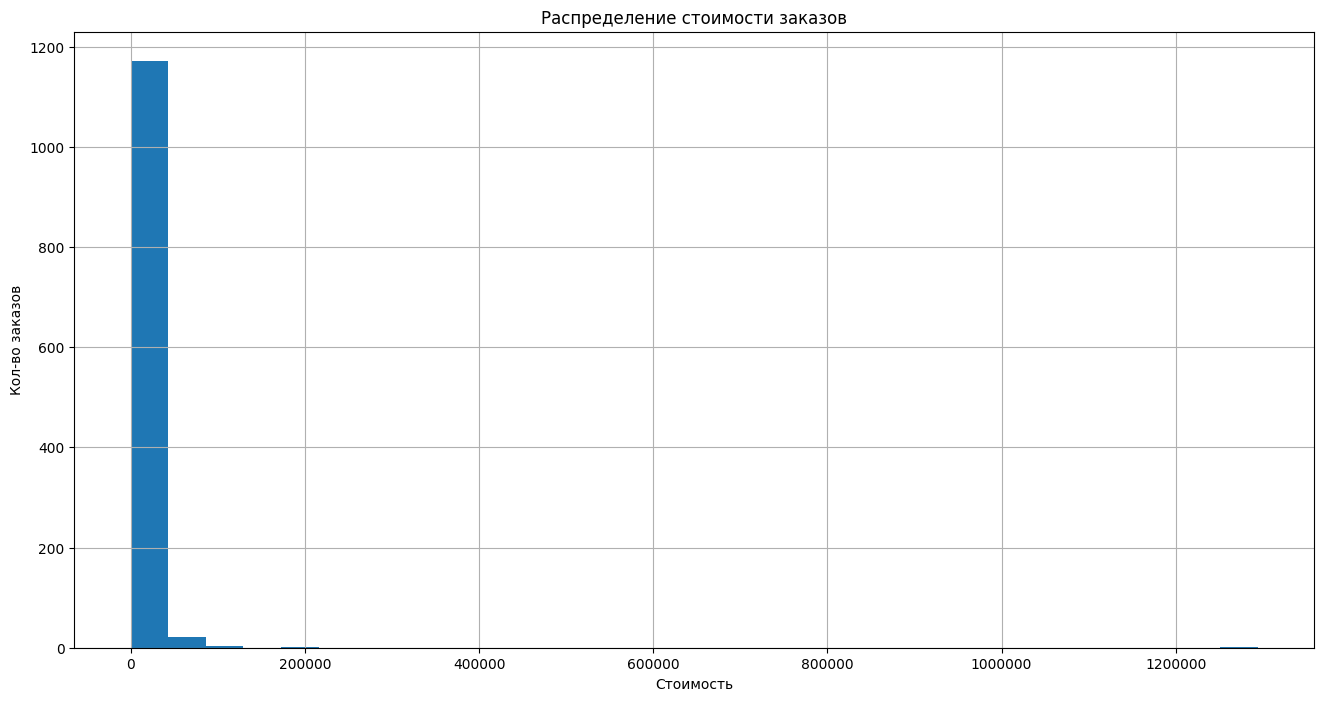

In [33]:
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.ylabel('Кол-во заказов')
plt.xlabel('Стоимость')
plt.title('Распределение стоимости заказов')
plt.ticklabel_format(style='plain')
plt.hist(orders['revenue'], bins= 30) 
plt.show()

Из гистограммы видно, что большинство заказов имеет стоимость менее 50 тыс. рублей. 
Но есть и аномалии - заказы стоимостью более 1200000 рублей.

Построим точечную диаграмму стоимости заказов:

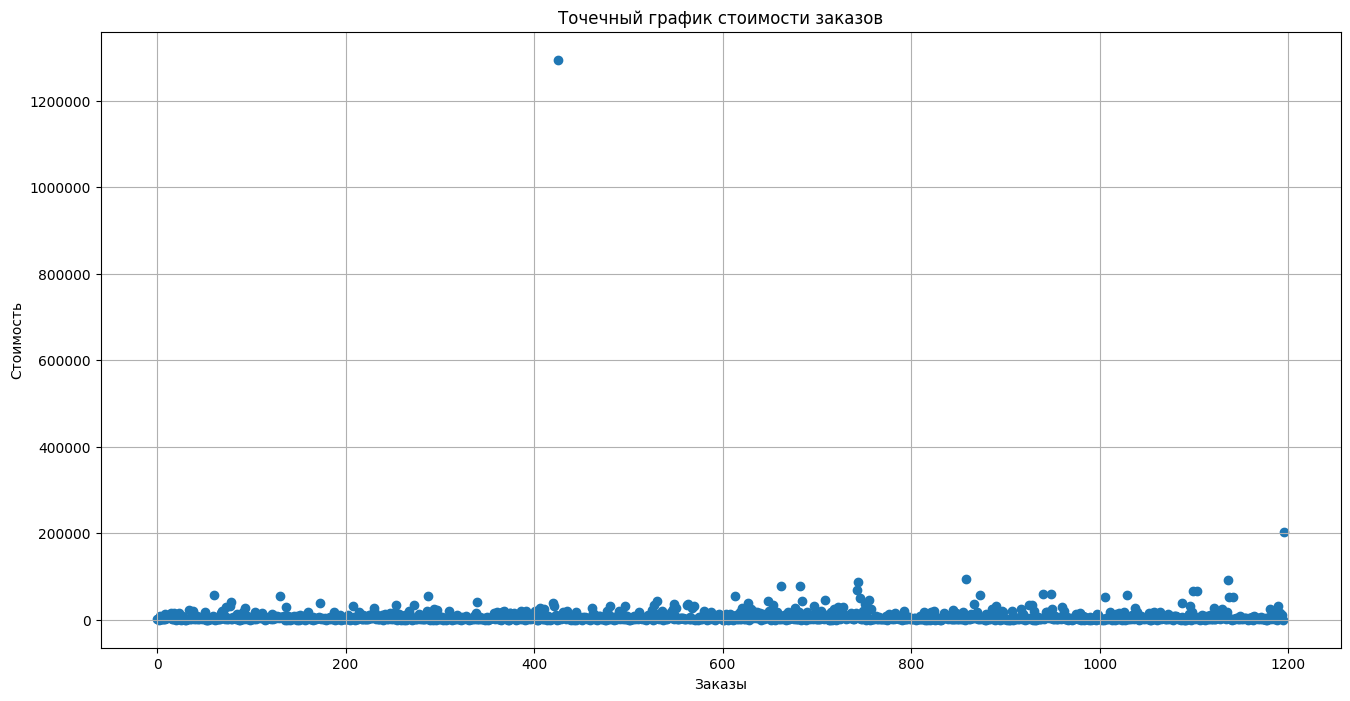

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(16, 8))
plt.scatter(x_values, orders['revenue'])
plt.grid(True)
plt.ylabel('Стоимость')
plt.xlabel('Заказы')
plt.title('Точечный график стоимости заказов')
plt.ticklabel_format(style='plain')
plt.show()

Из этого графика понятно, что есть аномальное  значение - заказ стоимостью более 1200000.

Чтобы лучше изучить график, ограничим значения стоимости по оси y:

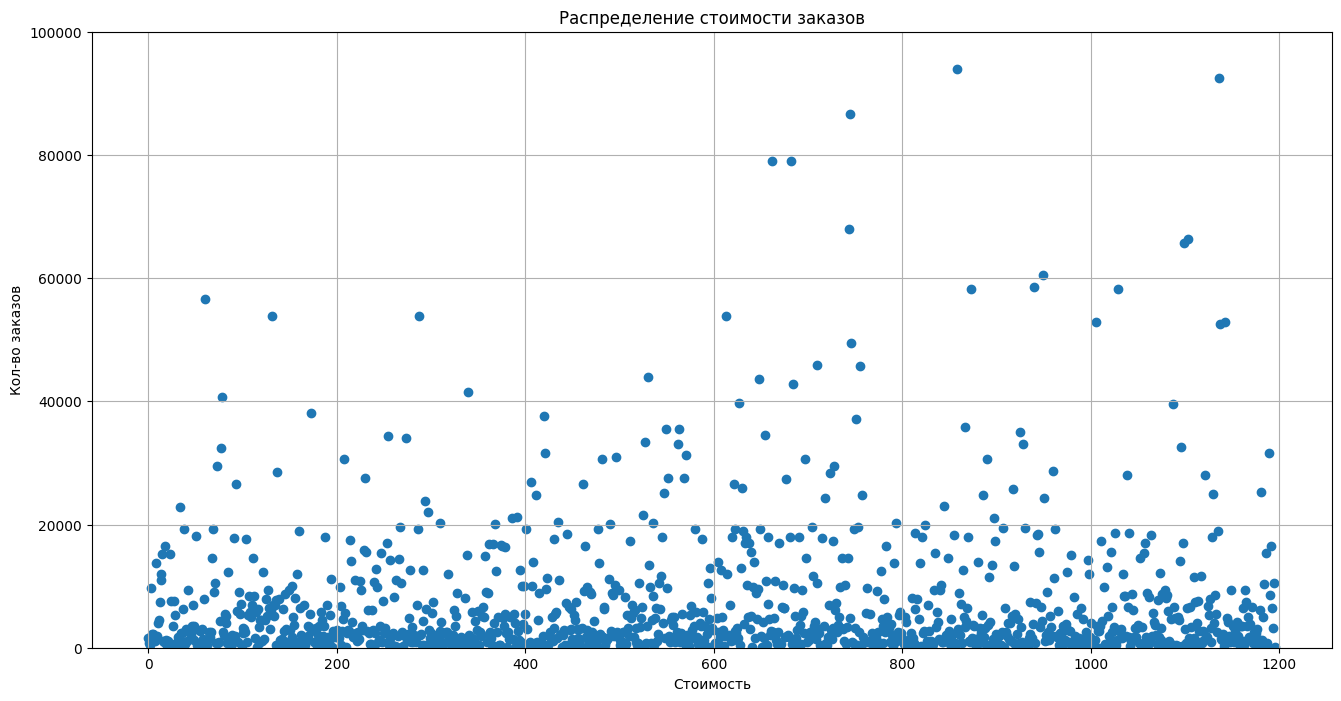

In [35]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(16, 8))
plt.ylim(0, 100000)

plt.scatter(x_values, orders['revenue'])
plt.grid(True)
plt.ylabel('Кол-во заказов')
plt.xlabel('Стоимость')
plt.title('Распределение стоимости заказов')
plt.ticklabel_format(style='plain')
plt.show()

По графику видно, что большинство заказов имеют стоимость менее 20000 рублей.
Посмотрим на значения процентилей:

### Определение аномальных заказов по стоимости <a class="anchor" id="di-bullet"></a>

Определим 95-й и 99-й перцентили стоимости заказов:

In [36]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

- 5% заказов имеют стоимость более 28000 рублей.
- не более 1% заказов стоит дороже 59 тыс. рублей.

**Вывод:**  За верхнюю границу определим стоимость в 59000 рублей. Так мы отсечем 1% пользователей с дорогими заказами.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным <a class="anchor" id="dj-bullet"></a>

Проверим, влияют ли аномалии в данных на конверсию в группах.
Для проверки гипотез будем использовать тест Уилкоксона-Манна-Уитни, так как в наших данных есть выбросы.

Формуллируем гипотезы:

**H0**: Различий в среднем количестве заказов между группами нет.

**H1**: Различия в среднем количестве заказов между группами есть.

In [37]:
#подготавливаем данные

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Oписание данных таблицы ``data``:

- ``date`` — дата;
- ``ordersPerDateA`` — количество заказов в выбранную дату в группе A;
- ``revenuePerDateA`` — суммарная выручка в выбранную дату в группе A;
- ``ordersPerDateB`` — количество заказов в выбранную дату в группе B;
- ``revenuePerDateB`` — суммарная выручка в выбранную дату в группе B;
- ``ordersCummulativeA`` — суммарное число заказов до выбранной даты включительно в группе A;
- ``revenueCummulativeA`` — суммарная выручка до выбранной даты включительно в группе A;
- ``ordersCummulativeB`` — суммарное количество заказов до выбранной даты включительно в группе B;
- ``revenueCummulativeB`` — суммарная выручка до выбранной даты включительно в группе B;
- ``visitorsPerDateA`` — количество пользователей в выбранную дату в группе A;
- ``visitorsPerDateB`` — количество пользователей в выбранную дату в группе B;
- ``visitorsCummulativeA`` — количество пользователей до выбранной даты включительно в группе A;
- ``visitorsCummulativeB`` — количество пользователей до выбранной даты включительно в группе B.

In [38]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# Формирируем выборки

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#проводим тест
alpha = 0.05 
results = stats.mannwhitneyu(sampleA, sampleB)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


print("P-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост среднего числа заказов группы B к группе A в %: {0:.3%}".format(sampleB.mean() / sampleA.mean() - 1))
 

Отвергаем нулевую гипотезу
P-value: 0.017
Относительный прирост среднего числа заказов группы B к группе A в %: 13.808%


**Вывод:** Статистически значемые различия в среднем числе заказов между группами A и B есть.
Причем группа B имеет относительный прирост на 13.808% перед группой A. Посмотрим, что скажут очищенные данные.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным <a class="anchor" id="dk-bullet"></a>

Гипотезы:

H0: Различий в среднем чеке заказа между группами нет.

H1: Различия в среднем чеке заказа между группами есть.

In [39]:
#проводим тест
alpha = 0.05 
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


print('P-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B к группе A в %: {0:.3%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


Не получилось отвергнуть нулевую гипотезу
P-value: 0.729
Относительный прирост среднего чека группы B к группе A в %: 25.871%
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Статистически значимых различий в среднем чеке между группой A и B нет, хоть и относительный прирост среднего чека группы B к группе A - 25.871% достаточно большой. Но такой прирост получен случайно, так как наблюдаемые различия не являются значимыми при таком уровне значимости.


### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным <a class="anchor" id="dl-bullet"></a>

Формуллируем гипотезы:

**H0**: Различий в среднем количестве заказов между группами по очищенным данным нет.

**H1**: Различия в среднем количестве заказов между группами по очищенным данным есть.

In [40]:
# найдем всех пользователей с аномально дорогими заказами или с аномально большим количеством заказов

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64
15


In [41]:
#формируем выборки
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#провоим тест
alpha = 0.05
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)



print('P-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B к группе A по очищенным данным в %: {0:.3%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

P-value: 0.014
Относительный прирост среднего числа заказов группы B к группе A по очищенным данным в %: 15.331%
Отвергаем нулевую гипотезу


**Вывод**: Статистически значемые различия в среднем числе заказов между группами A и B в очищенных данных есть. Причем в сравнении с сырыми данными показатели стали лучше. Относительный прирост среднего числа заказов группы B к группе A увеличился приблизительно на 2%, а p-значение уменьшилось. После очистки данных показатели среднего числа заказов группы B стали еще лучше.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным <a class="anchor" id="dm-bullet"></a>

Формуллируем гипотезы:

**H0**: Различий в среднем чеке между группами по очищенным данным нет.

**H1**: Различия в среднем чеке между группами по очищенным данным есть.

In [42]:
#проводим тест

alpha = 0.05
results = (
    stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'], 
                       orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue']
                      )
)


print(
    'P-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека группы B к группе A по очищенным данным в %: {0:.3%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

P-value: 0.851
Относительный прирост среднего чека группы B к группе A по очищенным данным в %: -0.575%
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Статистически значимых различий в среднем чеке между группой A и B по очищенным данным нет. Причем, сравнивая с сырыми данными, относительный прирост среднего чека группы B к группе A после очистки стал отрицательным, что говорит о том, что аномально дорогие заказы были как раз в группе B.

### Итоги: <a class="anchor" id="dn-bullet"></a>

 <div style="border:solid pink 3px; padding: 20px">

    
В результате анализа данных A/B тестирования:
    
    - Были найдены статисчтически значимые различия в среднем числе заказов между группами A и B. При этом группа B имеет относительный прирост 25.871%. После тестирования очищенных от аномалий данных статисчтически значимые различия тоже были найдены, а прирост группы B увеличился.
    
    - Не было найдено статистически значимых различий в среднем чеке между группами A и B. После очистки данных от аномалий относительный прирост среднего чека группы B  к группе A уменьшился и даже стал отрицательным.   
    
    
Исходя из результатов, я рекомендую остановить тестирование и зафиксировать победу группы B.

## Общий вывод <a class="anchor" id="e-bullet"></a>

<div style="border:solid blue 3px; padding: 20px"> 
    
На основе предоставленных данных крупного интернет-магазина

**При загрузке и предобработке данных:**
    
- не было обнаружено пропущенных значений
- не было обнаружено явных дубликатов
- были обнаружены и приведены к snake_case некорректные названия столбцов.
- были найдены и изменены на datetime некорректные типы данных значений в столбцах с датой.
    
**В ходе приоритезации гипотез было выявленно:** 
    - что пять самых приортетных гипотез, полученных с помощью фреймворка ICE совпадают с пятью самыми приоритетными гипотезами, полученными с помощью фреймворка RICE
    
Топ 5 самых приоритеных гипотез исходя из расчетов ICE:
-  Запустить акцию, дающую скидку на товар в день рождения
-  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
-  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
-  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
-  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
    
    
Топ-5 самых приоритетных гипотез исходя из расчета RICE:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
-  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
-  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
-  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
-  Запустить акцию, дающую скидку на товар в день рождения    
    
    
**В качестве самых приоритетных гипотез по двум фреймворкам я могу рекомендовать** 

    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. 
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    
    
**В результате анализа данных A/B тестирования:**
    
    - Были найдены статисчтически значимые различия в среднем числе заказов между группами A и B. При этом группа B имеет относительный прирост 25.871%. После тестирования очищенных от аномалий данных статисчтически значимые различия тоже были найдены, а прирост группы B увеличился.
    
    - Не было найдено статистически значимых различий в среднем чеке между группами A и B. После очистки данных от аномалий относительный прирост среднего чека группы B  к группе A уменьшился и даже стал отрицательным.   
    
**Исходя из результатов, я рекомендую остановить тестирование и зафиксировать победу группы B. Успех!**
    
    
**!!!Важно!!!** 
    
    - 58 пользователей присутствовали в обоих группах A/B -тестирования. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно. Стоит передать об этой ошибке разработчикам. 
    - Пользователи распределены в группах не равномерно. Разница в количестве пользователей между группами приблизительно равна 15%. Результаты анализа тестирования могут быть ненадежными.
    
**!!!Важно!!!**
    
    
[**Вернуться к началу проекта**](#s-bullet)